### Importownie pakietów

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

$\sum_{i=1}^N a_{ii}$

In [ ]:
filename = 'HeightsWeightsGender_dataset.xlsx'

# download the data form URL as a DataFrame
df = pd.read_excel(filename)

In [ ]:
df.sample(10)

Weight  Height  Gender
43      80     175    Male
38      50     164  Female
32      59     176    Male
9       80     180    Male
3       83     193    Male
25      73     201    Male
36      75     180  Female
29      82     188    Male
12      90     192    Male
18      72     186    Male

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Weight  46 non-null     int64 
 1   Height  46 non-null     int64 
 2   Gender  46 non-null     object
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [13]:
df.describe()

Weight      Height
count   46.000000   46.000000
mean    74.347826  178.891304
std     14.093682    8.974602
min     50.000000  155.000000
25%     67.000000  175.000000
50%     73.000000  180.000000
75%     82.750000  185.000000
max    120.000000  201.000000

In [ ]:
df['Weight'][df['Weight'] > 80]

0      90
3      83
7     120
8     105
11     81
12     90
13     85
17     87
21     83
23     90
26     82
29     82
35     85
37     85
44     95
Name: Weight, dtype: int64

<Axes: xlabel='Height', ylabel='Weight'>

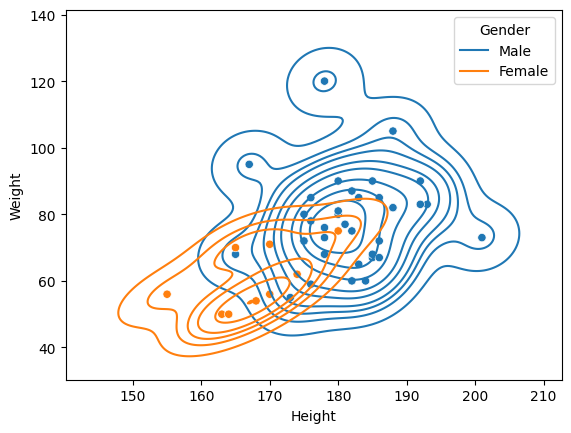

In [29]:
sns.scatterplot(data=df, x='Height', y='Weight', hue='Gender')
sns.kdeplot(data=df, x="Height", y="Weight", hue="Gender")

#### Przygotowanie danych dla modelu (wyodrębnienie z ramki)

In [49]:
features = ['Height', 'Weight']
target = ['Gender']

X = df[features].to_numpy()
Y = df[target].to_numpy()
print(Y.size, Y.shape, Y.ndim, sep='   ')

Y = [0 if y == 'Male' else 1 for y in Y.flatten()]

46   (46, 1)   2


In [55]:
# impportowanie modelu
from sklearn.linear_model import LogisticRegression

# utworzenie instancji
logreg = LogisticRegression()

# dopasowanie do danych (uczenie)
logreg.fit(X, Y)


LogisticRegression()

In [59]:
Y_pred = logreg.predict(X)

In [68]:
print(100 * np.sum(Y == Y_pred) / len(Y))

89.1304347826087


In [70]:
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, X, Y, cv=5)

array([0.8       , 1.        , 0.88888889, 0.77777778, 1.        ])

In [71]:
import joblib
joblib.dump(logreg, "logreg.pkl") 

['logreg.pkl']

In [73]:
logreg_zpliku = joblib.load("logreg.pkl")

In [75]:
logreg_zpliku.predict([[155,44]])

array([1])